# Project: Investigate a Dataset (No show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#import">Imported Libraries</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limit">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on whether patients show up for their appointment. A number of characteristics about the patient are included in each row.

<a id='import'></a>
## Imported Libraries

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
#Creating a function to visualize the data
def visualize(data, kind, alpha=None, xlabel = None, ylabel = None, title = None, label = None, figsize = None, color = None):
    data.plot(kind=kind, alpha=alpha, title=title, xlabel=xlabel, ylabel=ylabel, label=label, figsize = figsize, color=color)

<a id='wrangling'></a>
# Data Wrangling

In [69]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [70]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [71]:
df.duplicated().sum()

0

In [72]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Conclusions From the Wrangling
> 1) The "ScheduledDay" & "AppointmentDay" need to be turned into "datetime" dates for easier handling with python and pandas
> 2) the min age is -1 which means there is properly an entry that needs to be removed
> 3) "No-show" should be renamed to avoid any future errors
> 4) There is no Duplicated or Null data to be removed

<a id='cleaning'></a>
# Data Cleaning

In [73]:
# Changing the Dates to Datetime format
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["AppointmentID"] = pd.to_datetime(df["AppointmentID"])

In [74]:
# finding the -1 age record
df.query("Age == -1")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,1970-01-01 00:00:00.005775010,F,2016-06-06 08:58:13+00:00,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [75]:
#Removing that Row
df.drop([99832], axis=0,inplace=True)

In [76]:
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [77]:
# Renaming the "No-show" Column
df.rename(columns= {"No-show" : "No_show"}, inplace=True)

In [78]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,1970-01-01 00:00:00.005642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
# Exploratory Data Analysis

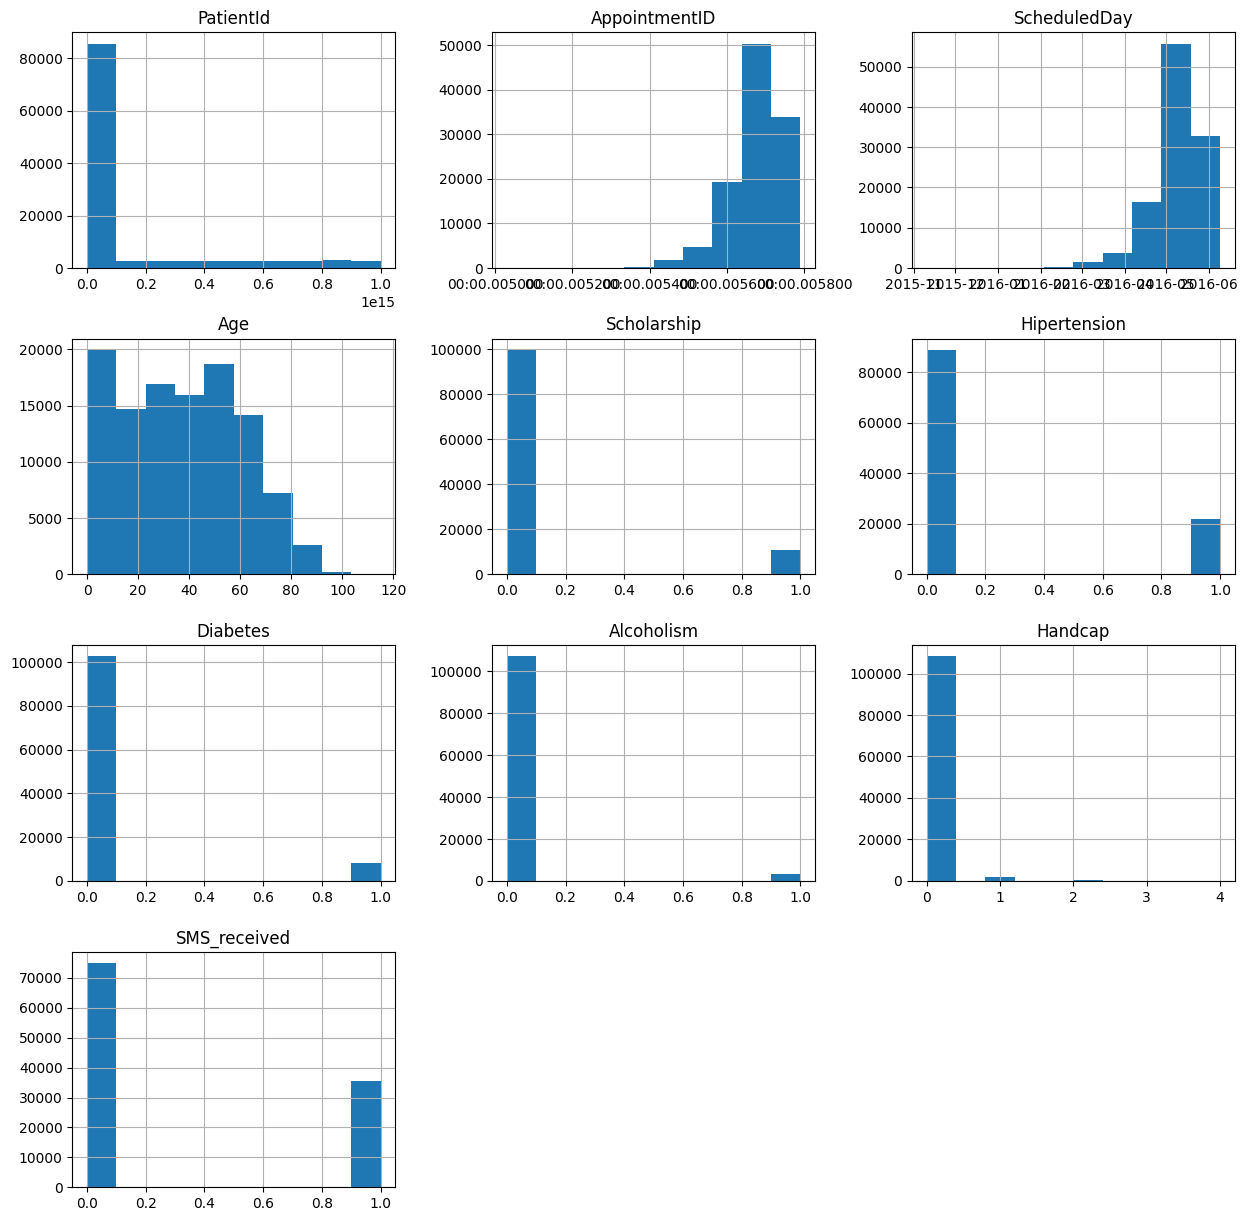

In [79]:
# Producing a general Histogram to have a better understanding of the data set
df.hist(figsize=(15,15));

## Question 1 : Where do most patients come from:

In [80]:
# Creating a show and no show Variables to make future analysis easier
no_show = df.query("No_show == 'No'")
show = df.query("No_show == 'Yes'")

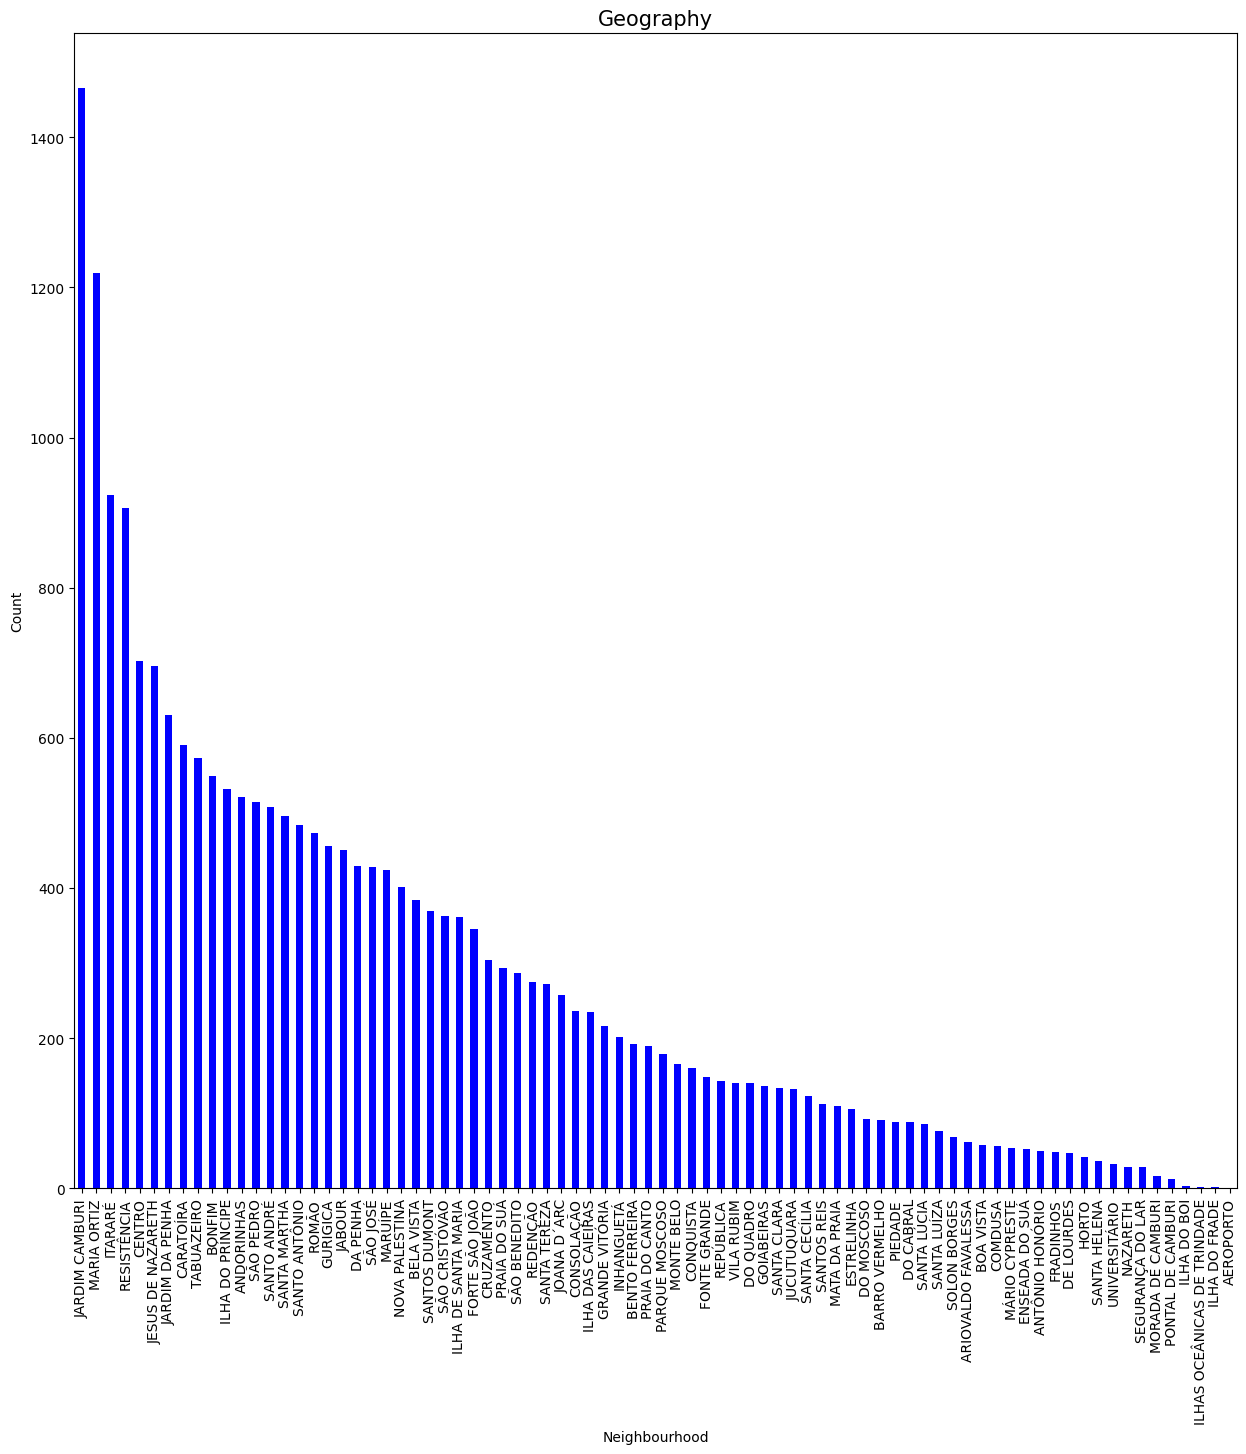

In [81]:
visualize(show["Neighbourhood"].value_counts(),kind='bar', alpha=1, color="blue",figsize=(15,15))
plt.title("Geography",fontsize=15)
plt.xlabel("Neighbourhood", fontsize=10)
plt.ylabel("Count", fontsize=10);

In [82]:
show["Neighbourhood"].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

> ### Seems like the "Jardim Camburi" Neighbourhood is where most patients came from and the "Aeroporto" is where the least patients came from

## Question 2 : Which age demography showed up more?

In [83]:
median_age = df["Age"].median()

In [84]:
young = df.query("Age < {}".format(median_age,"No_show == 'Yes'"))
old = df.query("Age >= {}".format(median_age,"No_show == 'Yes'"))

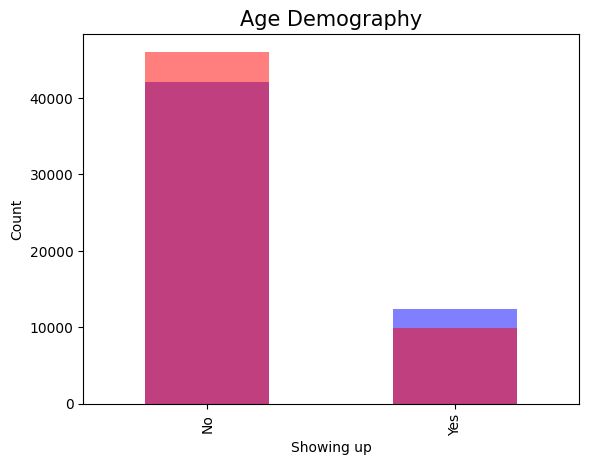

In [85]:
visualize(young["No_show"].value_counts(),kind='bar', alpha=0.5, color="blue")
visualize(old["No_show"].value_counts(),kind='bar', alpha=0.5, color="red")
plt.title("Age Demography",fontsize=15)
plt.xlabel("Showing up", fontsize=10)
plt.ylabel("Count", fontsize=10);

> ### The Younger Demography seems to me showing up more Than the older one

# Question 3 : What Gender was more likely to show up?

In [86]:
male = df.query("Gender == 'M'")
female = df.query("Gender == 'F'")

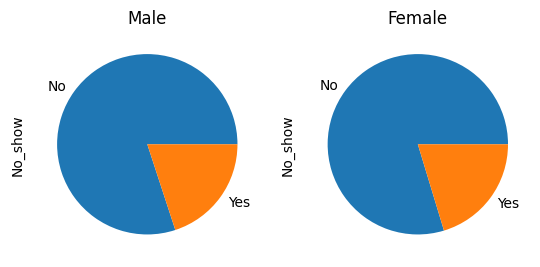

In [87]:
fig, axes = plt.subplots(1,2)
male["No_show"].value_counts().plot(kind='pie',title= "Male", ax=axes[0])
female["No_show"].value_counts().plot(kind='pie',title= "Female", ax=axes[1]);

In [88]:
male["No_show"].value_counts()

No     30962
Yes     7725
Name: No_show, dtype: int64

In [89]:
female["No_show"].value_counts()

No     57245
Yes    14594
Name: No_show, dtype: int64

> ### Females seem to be showing up almost double as often as males, It doesn't show on the Pie chart since the total amount of females is greater than that of the male demography

# Question 4 : Did receiving an SMS make more people show up?

In [90]:
received = df['SMS_received'] == 1
not_received = df['SMS_received'] == 0

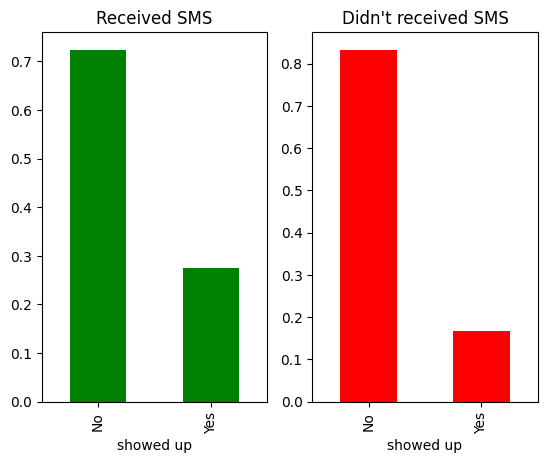

In [91]:
fig , axes = plt.subplots(1,2)
df.No_show[received].value_counts(normalize=True).plot(kind='bar', alpha=1, color='green',title="Received SMS", xlabel="showed up",ax=axes[0])
df.No_show[not_received].value_counts(normalize=True).plot(kind='bar', alpha=1, color='red',title="Didn't received SMS" ,xlabel="showed up",ax=axes[1]);

> ### The percentage of People who received an SMS and showed up is higher than those who didn't receive one

<a id='conclusions'></a>
# Conclusions

> ### 1)The most frequent Neighbourhood Where patients came from is "JARDIM CAMBURI"
> ### 2)Younger people are more likely to show up
> ### 3)Females seem to show up more than men, but compared to the total size of each group it's proportionally similar
> ### 4)Receiving an SMS increases the Probability of a Patient Showing up

<a id='limit'></a>
# Limitations

> ### One limitation faced was in the gender comparison where the female sample was considerably larger than that of the male sample, As a result the bar plot seemed as if the amount of male and females showing up was the same were as in reality it was much different